# Chapter 2 : Coding First Neurons 

#### Coding a single neuron 

3 inputs to the neuron and one output , and each input needs a weight and a common bias to the neuron . Remember the linear equation y=mx+c

In [1]:
#randomly choosing some inputs and biases . 

inputs = [ 1 , 2 , 3 ]
weights = [ 0.2 , 0.8 , - 0.5 ]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] 
          + bias)

print (output)


2.3


#### Layer of neurons 

layers are group of neurons . each neuron in a layer takes the exact same input . But each neuron can contain own set of weights and biases and thus producing a unique output . 

For a 4 input and 3 layered network . Code can be visualized as follows 

In [2]:
inputs = [ 1 , 2 , 3 , 2.5 ]

weights1 = [ 0.2 , 0.8 , - 0.5 , 1 ]
weights2 = [ 0.5 , - 0.91 , 0.26 , - 0.5 ]
weights3 = [ - 0.26 , - 0.27 , 0.17 , 0.87 ]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
# Neuron 1:
inputs[ 0 ] * weights1[ 0 ] +
inputs[ 1 ] * weights1[ 1 ] +
inputs[ 2 ] * weights1[ 2 ] +
inputs[ 3 ] * weights1[ 3 ] + bias1,
# Neuron 2:
inputs[ 0 ] * weights2[ 0 ] +
inputs[ 1 ] * weights2[ 1 ] +
inputs[ 2 ] * weights2[ 2 ] +
inputs[ 3 ] * weights2[ 3 ] + bias2,
# Neuron 3:
inputs[ 0 ] * weights3[ 0 ] +
inputs[ 1 ] * weights3[ 1 ] +
inputs[ 2 ] * weights3[ 2 ] +
inputs[ 3 ] * weights3[ 3 ] + bias3]

print (outputs)

[4.8, 1.21, 2.385]


This is just a single layer , but for multiple layered networks it will get super hard to code something like above . We can use looops to make life little easier . 

In [4]:
inputs = [ 1 , 2 , 3 , 2.5 ]
weights = [ [ 0.2 , 0.8 , - 0.5 , 1 ],
            [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
            [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2 , 3 , 0.5 ]

layer_outputs = [] # to store the outputs 

# python tip : The zip () function lets us iterate over multiple iterables 
# (lists in this case) simultaneously
for neuron_wts , neuron_bias in zip(weights,biases): 
    
    neuron_output = 0 
    
    for input_var , wts in zip(inputs,neuron_wts) : 
        
        neuron_output += input_var*wts
    
    neuron_output+=neuron_bias
    
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


#### Tensors, Arrays and Vectors

Tensors can be thought of as close relative to arrays . (not homologus , Dimensions can be different)

A definiton : A tensor object is an object that can be represented as an array.

#### Dot Product and Vector Addition

Dot product : 
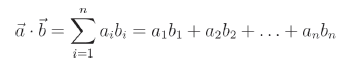


Vector Addition : 
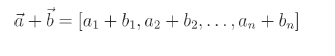

#### A Single Neuron with NumPy

We have coded all the multiplications earlier mannually in the code , lets make it easy with numpy dot product . 

In [5]:
import numpy as np
inputs = [ 1.0 , 2.0 , 3.0 , 2.5 ]
weights = [ 0.2 , 0.8 , - 0.5 , 1.0 ]
bias = 2.0
outputs = np.dot(weights, inputs) + bias
print (outputs)

4.8


#### A Layer of Neurons with NumPy 

same thing we did earlier but with numpy . 

In [8]:
inputs = [ 1.0 , 2.0 , 3.0 , 2.5 ]
weights = [[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2.0 , 3.0 , 0.5 ]

#see how the numpy is handling the dot product here 
#whatever comes first decides the output shape , keep it in mind 
layer_outputs = np.dot(weights, inputs) + biases
print (layer_outputs)

[4.8   1.21  2.385]


#### A Batch of Data 

until now we are dealing with only one input , now tend to receive data input in batches . 

In general neural nets take many samples at a time to processing due to the following reasons . 
1. it’s faster to train in batches in parallel processing
2. Batches help with generalization during training . (check def in chapter 1)


book had a better description than i can ask , here it is :

If you fit (perform a step of a training process) on one sample at a time, you’re highly likely to keep fitting to that individual sample, rather than slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or training in batches gives you a higher chance of making more meaningful changes to weights and biases.

Here is damn good animation showing how batch size effects: https://nnfs.io/vyu


#### Matrix product 

rows and colums dot product , not the num of rows of matrix 1 should be equal to num of cols of matrix 2 

#### Transposition for the Matrix Product
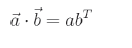

In [9]:
a = [ 1 , 2 , 3 ]
b = [ 2 , 3 , 4 ]
a = np.array([a])
b = np.array([b]).T
np.dot(a, b)

array([[20]])

#### A Layer of Neurons & Batch of Data w/ NumPy

now that we have a batch of inputs and layer of neurons . its time for matrix multiplication to get the output of a layer .

we multiply the inputs batch and weights transposed to get the data needed . 

In [14]:
inputs = [[ 1.0 , 2.0 , 3.0 , 2.5 ] ,
         [2.0, 5.0, -1.0, 2.0],
         [-1.5, 2.7, 3.3,-0.8]]
weights = [[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2.0 , 3.0 , 0.5 ]

outputs = np.dot(inputs , np.array(weights).T) +biases #y =mx+c

print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
